# Cutting Stock Example

Optimizing the cutting of strips of Sheet to minimize waste. It involves cutting large sheets into the optimal number of smaller strips to meet customer orders while minimizing waste.  
The sheets can represent any type of material that comes in a strip that is cut into smaller strips.						

**Problem**:  
A garment factory produces rolls of garment in the following 2 sizes: rolls that are 75 and 55 inches wide. Customers order garment rolls in the following 3 sizes: rolls that are 36, 25 and 13 inches wide. The factory must cut the rolls in the correct number of customers demand to meet the individual customer orders while minimizing waste. Waste represents garment cut from the original 75 or 55 rolls which is not included in a customer order and is left-over. The customer's demand is to have 40 cuts of 36", 150 cuts of 25" and 350 cuts of 13". 

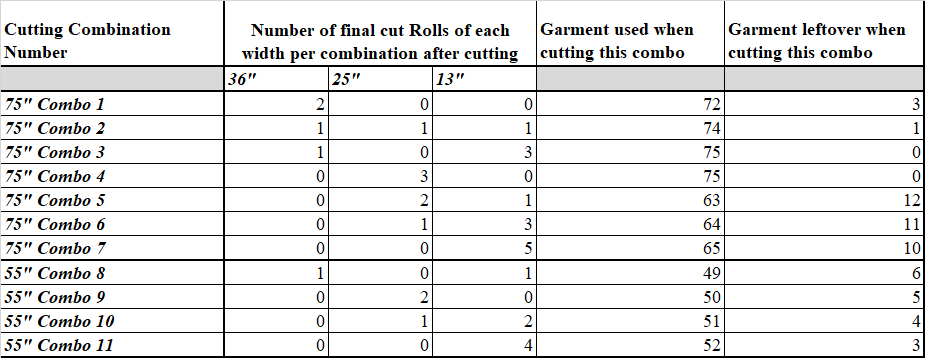


In [7]:
from pulp import *

prob=LpProblem("Minimize waste",LpMinimize)

combos=["combo01","combo02","combo03","combo04","combo05",
        "combo06","combo07","combo08","combo09","combo10","combo11"]

#Number of final cut Rolls of each width per combination after cutting:

inches_36={combos[0]:2,
           combos[1]:1,
           combos[2]:1,
           combos[3]:0,
           combos[4]:0,
           combos[5]:0,
           combos[6]:0,
           combos[7]:1,
           combos[8]:0,
           combos[9]:0,
           combos[10]:0}

inches_25={combos[0]:0,
           combos[1]:1,
           combos[2]:0,
           combos[3]:3,
           combos[4]:2,
           combos[5]:1,
           combos[6]:0,
           combos[7]:0,
           combos[8]:2,
           combos[9]:1,
           combos[10]:0}

inches_13={combos[0]:0,
           combos[1]:1,
           combos[2]:3,
           combos[3]:0,
           combos[4]:1,
           combos[5]:3,
           combos[6]:5,
           combos[7]:1,
           combos[8]:0,
           combos[9]:2,
           combos[10]:4}

#Garmement leftover when cutting this combo:

leftover={combos[0]:3,
           combos[1]:1,
           combos[2]:0,
           combos[3]:0,
           combos[4]:12,
           combos[5]:11,
           combos[6]:10,
           combos[7]:6,
           combos[8]:5,
           combos[9]:4,
           combos[10]:3}

#Create the variables
variables=LpVariable.dicts("",combos,0,None,LpInteger)

#Addition of the Objective Function
prob+=lpSum([leftover[i]*variables[i] for i in combos])

#Addition of the constraints
prob+=lpSum([inches_36[i]*variables[i] for i in combos])==40
prob+=lpSum([inches_25[i]*variables[i] for i in combos])==150
prob+=lpSum([inches_13[i]*variables[i] for i in combos])==350

#Solution to the problem:
prob.solve()
print ("Status:",LpStatus[prob.status])
print("")
for v in prob.variables():
    print (v.name,"=", v.varValue)
print("")
print("Total Waste =", value(prob.objective))

Status: Optimal

_combo01 = 0.0
_combo02 = 2.0
_combo03 = 38.0
_combo04 = 49.0
_combo05 = 0.0
_combo06 = 0.0
_combo07 = 0.0
_combo08 = 0.0
_combo09 = 0.0
_combo10 = 1.0
_combo11 = 58.0

Total Waste = 180.0
